# Implementing t-SNE on different datasets

### Blogposts followed:
- MLExplained : https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/
- Alexander Fabisch t-SNE notebook : https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
# creating synthetic dataset
A = np.random.normal(scale=1, size=(100, 3))
B = np.array([x for x in np.random.normal(scale=5, size=(500, 3)) if np.linalg.norm(x) > 7])

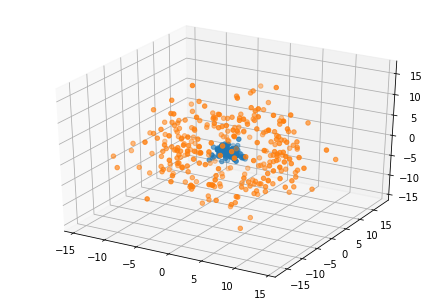

In [5]:
# visualizing data in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2])
ax.scatter(B[:, 0], B[:, 1], B[:, 2])

In [7]:
# visualizing it after PCA
X = np.r_[A, B]
X2 = PCA(n_components=2).fit_transform(X)

In [10]:
print(X.shape); print(X2.shape)

(388, 3)
(388, 2)


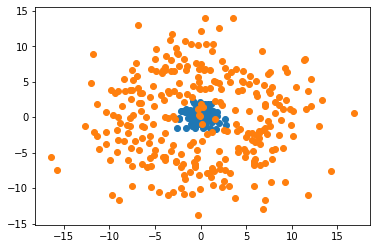

In [11]:
A2 = X2[:A.shape[0], :]
B2 = X2[A.shape[0]:, :]
plt.scatter(A2[:, 0], A2[:, 1])
plt.scatter(B2[:, 0], B2[:, 1])

Since PCA is a linear projection, it cannot capture non-linear dependencies.

In [14]:
# visualizing after t-SNE
X3 = TSNE(n_components=2).fit_transform(X)

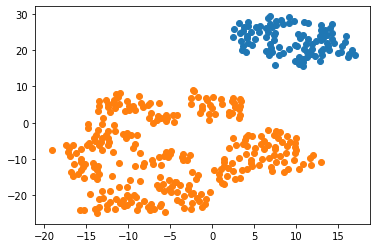

In [15]:
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

It can be seen that the points from the two clusters are well separated.

In [19]:
# running t-SNE multiple times to see how the results change
def plot_tsne():
    X3 = TSNE(n_components=2).fit_transform(X)
    A3 = X3[:A.shape[0], :]
    B3 = X3[A.shape[0]:, :]
    plt.scatter(A3[:, 0], A3[:, 1])
    plt.scatter(B3[:, 0], B3[:, 1])

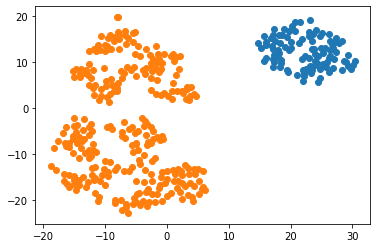

In [22]:
# 1
plot_tsne()

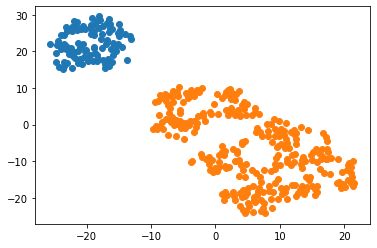

In [23]:
# 2
plot_tsne()

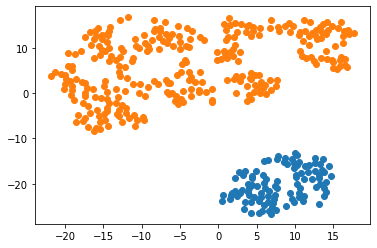

In [24]:
# 3
plot_tsne()

Results change but still are fairly reliable.

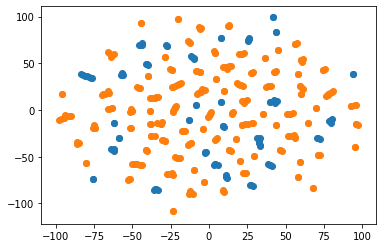

In [26]:
# experimenting with perplexity = 1
X3 = TSNE(n_components=2, perplexity=1).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

With perplexity 1 all the points are scattered with no structure. It is because perplexity-1 means you only look at one neighbor for each point, which makes it difficult to find local structure.

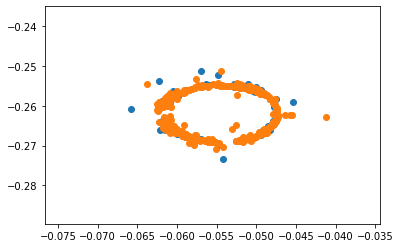

In [28]:
# experimenting with perplexity = 400
X3 = TSNE(n_components=2, perplexity=400).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

With perplexity 400 all the points are in one blob. It's because, in this case, perplexity-400 means all the points are considered as neighbors.

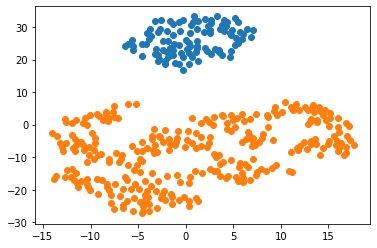

In [33]:
# experimenting with early exaggeration
# early exaggeration strengthens the ties between local points to create smaller clusters
# during initial optimization

# experimenting with early exaggeration = 1
X3 = TSNE(n_components=2, early_exaggeration=1).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

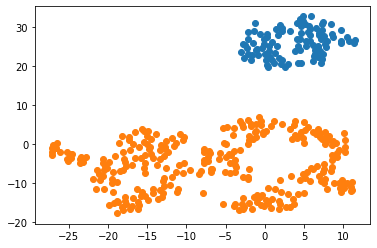

In [37]:
# experimenting with early exaggeration=500
X3 = TSNE(n_components=2, early_exaggeration=500).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])